# Logistic Regression
## Credit Card defaulters classification using Logistic Regression

###### Step 1: Importing the necessary libraries for loading, transforming, visualizing the data


In [102]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")

###### Load Credit Default file

In [103]:
cred_df = pd.read_csv("default.csv")

In [104]:
cred_df.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [105]:
cred_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
default    10000 non-null object
student    10000 non-null object
balance    10000 non-null float64
income     10000 non-null float64
dtypes: float64(2), object(2)
memory usage: 312.6+ KB


###### Step 2: Let us plot a boxplot with default and balance on the x and y axis respectively to understand their distribution

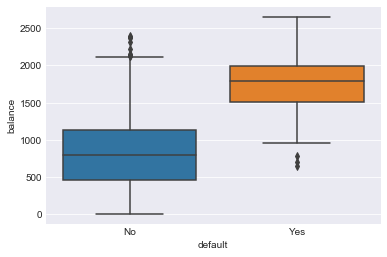

In [106]:
sns.boxplot(x='default', y='balance', data=cred_df)
plt.show()

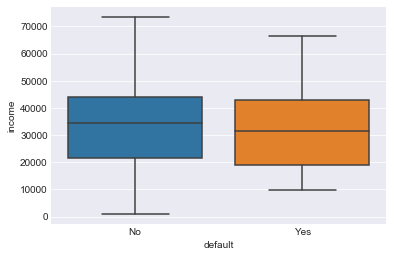

In [107]:
sns.boxplot(x='default', y='income', data=cred_df)
plt.show()

###### As it can be clearly observed above, balance as a feature provides more variability compared to income

###### Lets us use the linear regression plot provided by seaborn to look at the spread of the datapoints

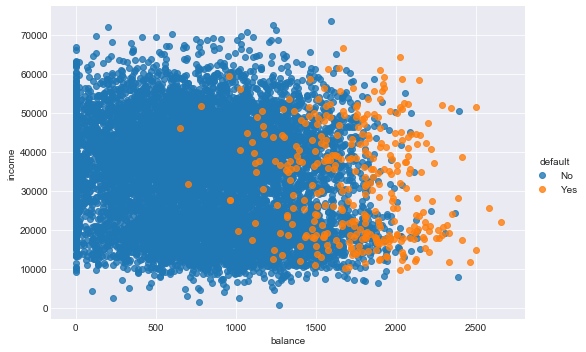

In [108]:
sns.lmplot(x='balance', y='income', hue = 'default', data=cred_df, aspect=1.5, ci = None, fit_reg = False)
plt.show()

###### As per the initial hunch, it seems students are more in number in terms of defaulters. The reason could be they dont generally have steady earnings

In [109]:
pd.crosstab(cred_df['default'], cred_df['student'], rownames=['Default'], colnames=['Student'])

Student,No,Yes
Default,,
No,6850,2817
Yes,206,127


###### Since default contains categorical values lets convert it into numerical data

In [110]:
default_dummies = pd.get_dummies(cred_df.default, prefix='default')
default_dummies.drop(default_dummies.columns[0], axis=1, inplace=True)
cred_df = pd.concat([cred_df, default_dummies], axis=1)
cred_df.head()

,default,student,balance,income,default_Yes
0,No,No,729.526495,44361.625074,0
1,No,Yes,817.180407,12106.134700,0
2,No,No,1073.549164,31767.138947,0
3,No,No,529.250605,35704.493935,0
4,No,No,785.655883,38463.495879,0


In [111]:
cred_df = pd.get_dummies(cred_df, columns = ['student'], drop_first = True)

In [112]:
cred_df.head()

,default,balance,income,default_Yes,student_Yes
0,No,729.526495,44361.625074,0,0
1,No,817.180407,12106.134700,0,1
2,No,1073.549164,31767.138947,0,0
3,No,529.250605,35704.493935,0,0
4,No,785.655883,38463.495879,0,0


In [ ]:
cred_df.drop('default', axis = 1, inplace = True)

In [ ]:
cred_df.head()

##### Step 3: Lets us build a simple Logistic Regression Model  

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
X = cred_df[["balance", "income", "student_Yes"]]

In [ ]:
y = cred_df["default_Yes"]

In [ ]:
logreg_simple = LogisticRegression(C = 0.01, class_weight = "balanced")
model_logreg = logreg_simple.fit(X, y)

In [ ]:
model_simple_predict = model_logreg.predict(X)

###### Let's split the data into train and test for more advanced models and results

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 123)

In [ ]:
logreg_advanced = LogisticRegression(C = 0.01, class_weight = "balanced")

In [ ]:
model_advanced = logreg_advanced.fit(X_train, y_train)

In [ ]:
model_advanced.score(X_train, y_train)

In [ ]:
model_adv_pred = model_advanced.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
accuracy_score(y_test, model_adv_pred) * 100

#### With test accuracy of 81% we can say that our model is performing moderately and there are still scope for improvement.

In [ ]:
cf_matrix = confusion_matrix(y_test, model_adv_pred)

In [ ]:
sns.heatmap(cf_matrix, annot = True, fmt = 'd', cmap = "coolwarm", xticklabels = ['Yes', 'No'], yticklabels = ['Yes', 'No']);

In [ ]:
classification_report(y_test, model_adv_pred)